In [2]:
import pandas as pd
import seaborn as sns


In [3]:
df =pd.read_csv('car_data.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [6]:
##check missing and null values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [9]:
final_dataset=df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type','transmission', 'owner']]

In [10]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
final_dataset['Current_year']=2022

In [12]:
final_dataset['Number of years']=final_dataset['Current_year']-final_dataset['year']

In [13]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current_year,Number of years
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,10
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022,5
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8


In [14]:
##delete the column 'year' from the dataset
final_dataset.drop(['year'],axis=1,inplace=True)

In [15]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Current_year,Number of years
0,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,600000,100000,Diesel,Individual,Manual,First Owner,2022,10
3,250000,46000,Petrol,Individual,Manual,First Owner,2022,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8


In [16]:
final_dataset=pd.get_dummies(final_dataset, drop_first=True)

In [17]:
final_dataset.head()

,selling_price,km_driven,Current_year,Number of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,2022,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,2022,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,2022,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,2022,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,2022,8,1,0,0,0,1,0,1,0,1,0,0


In [18]:
final_dataset.corr()

,selling_price,km_driven,Current_year,Number of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,NaN,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,NaN,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
Current_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of years,-0.413922,0.419688,NaN,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,NaN,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,NaN,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,NaN,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,NaN,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,NaN,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,NaN,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578


In [19]:
import seaborn as sns

In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


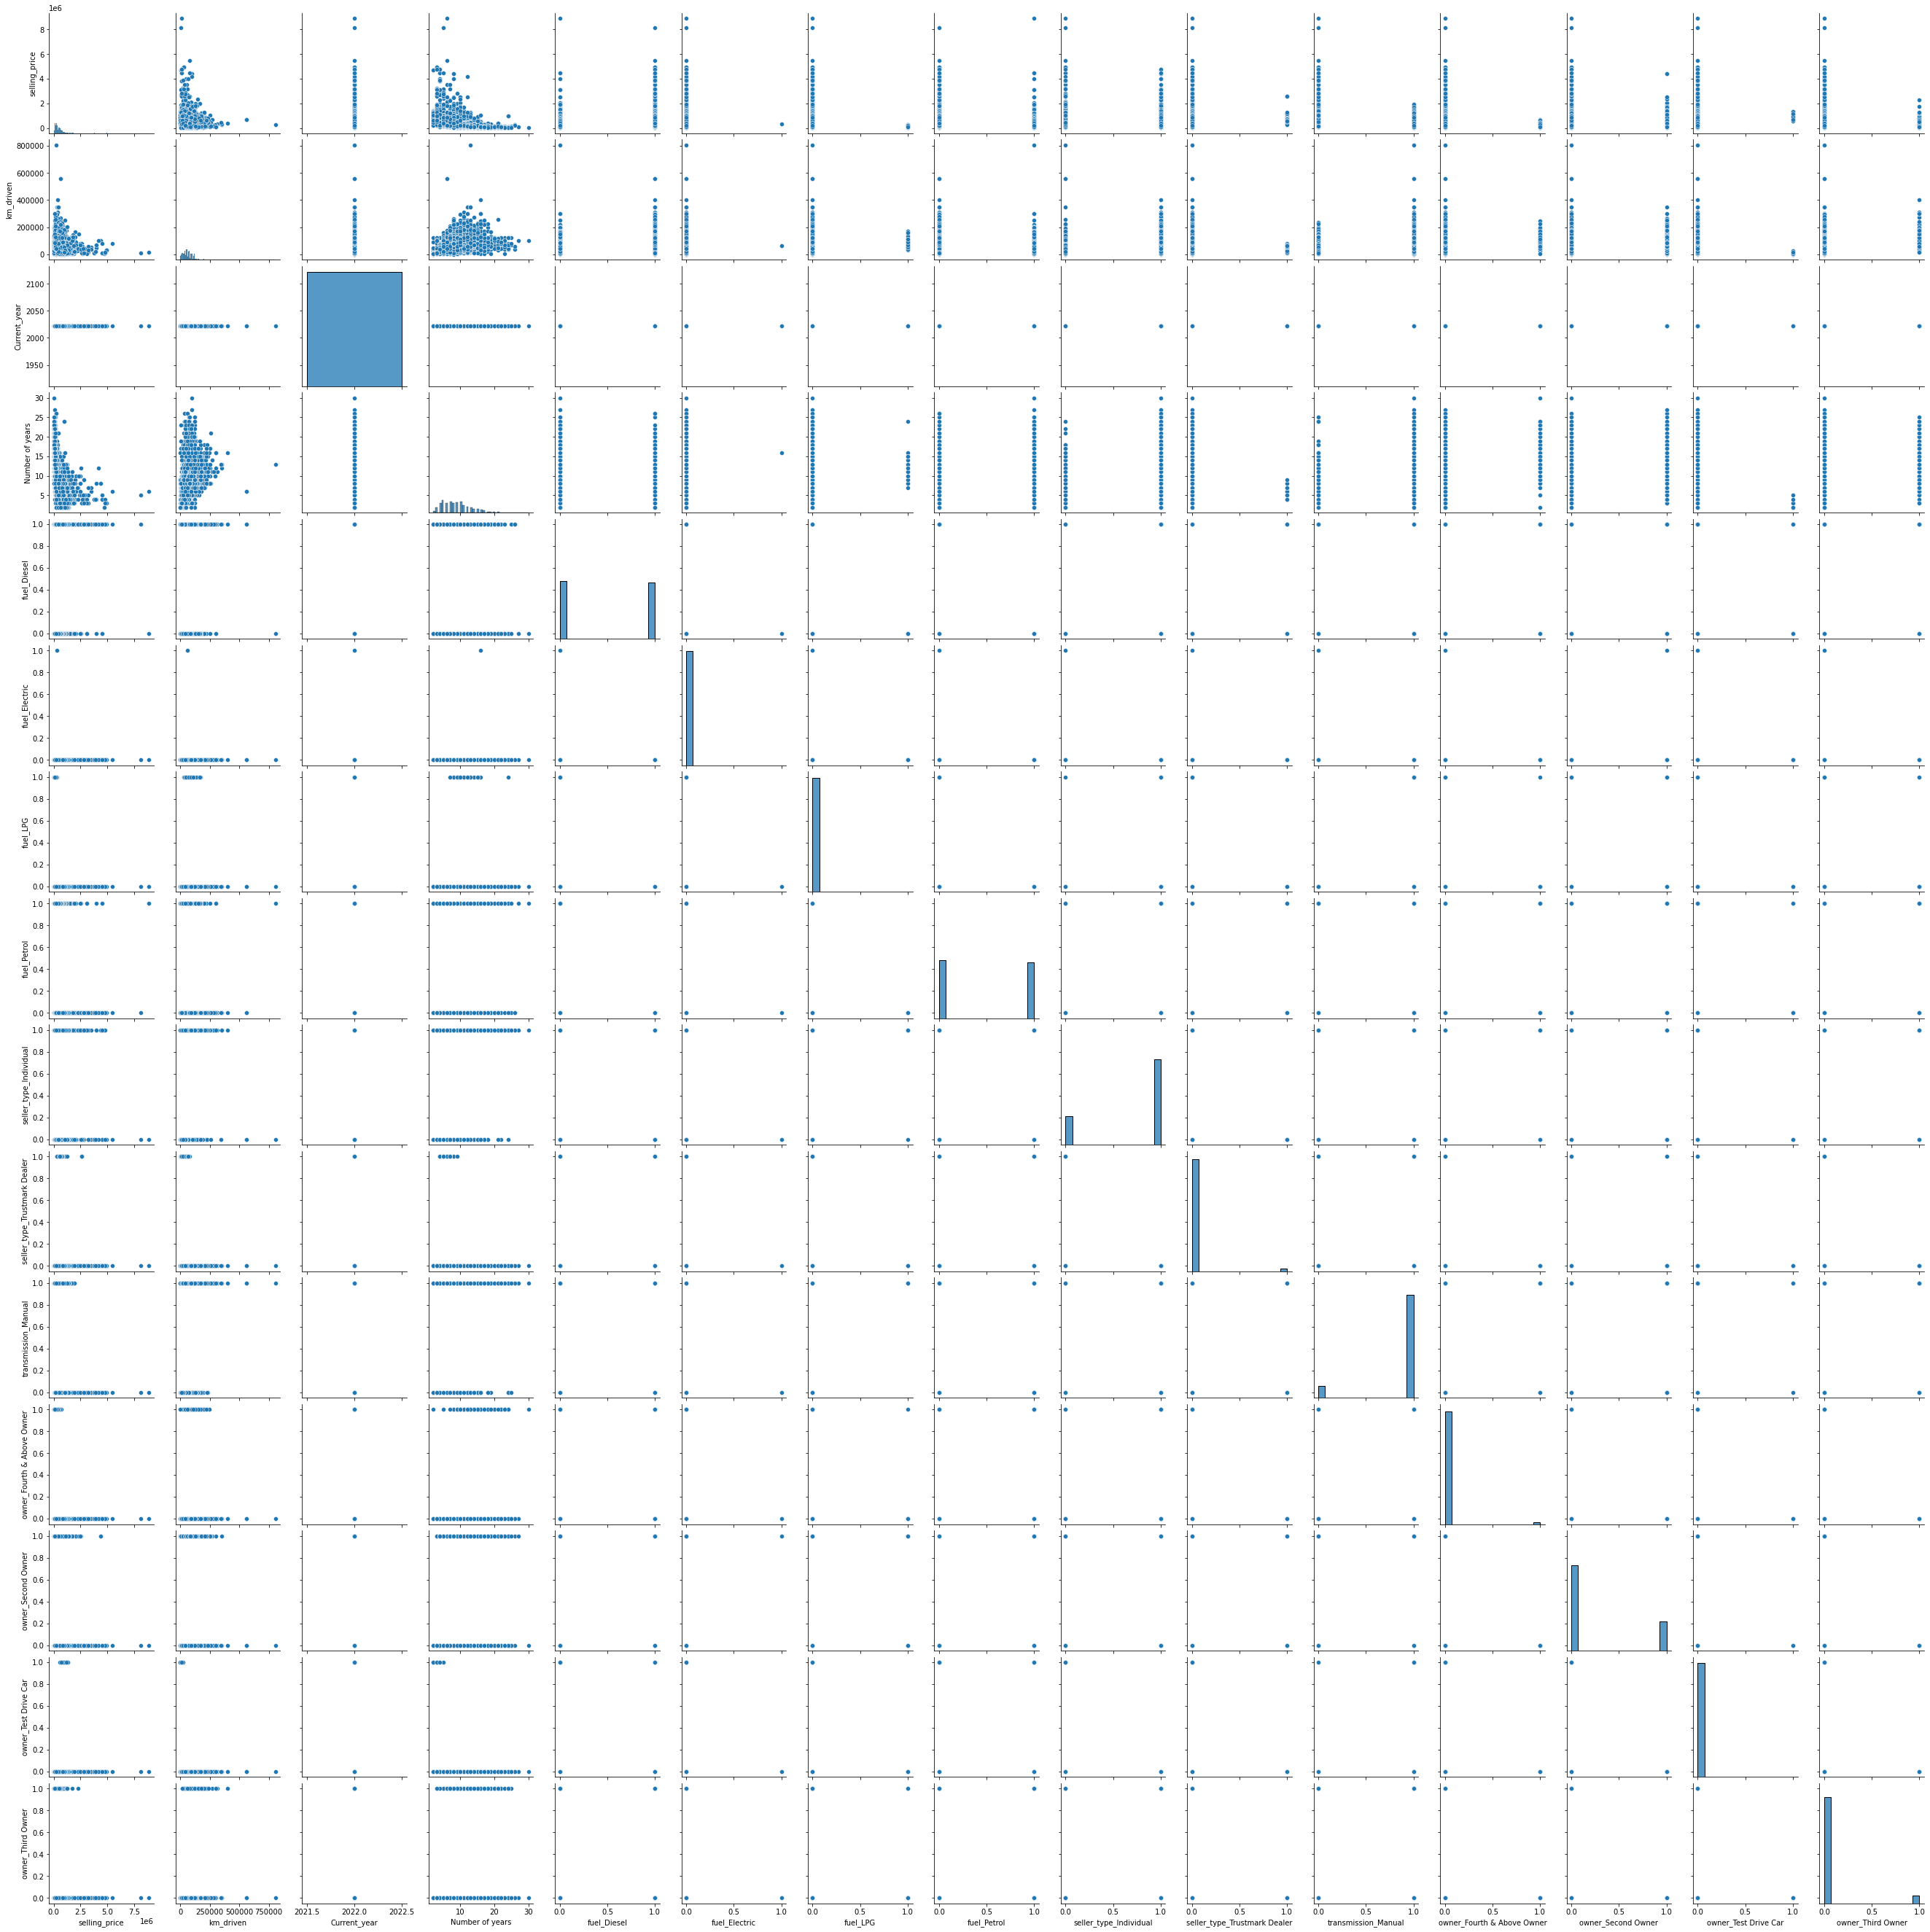

In [21]:
sns.pairplot(final_dataset)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

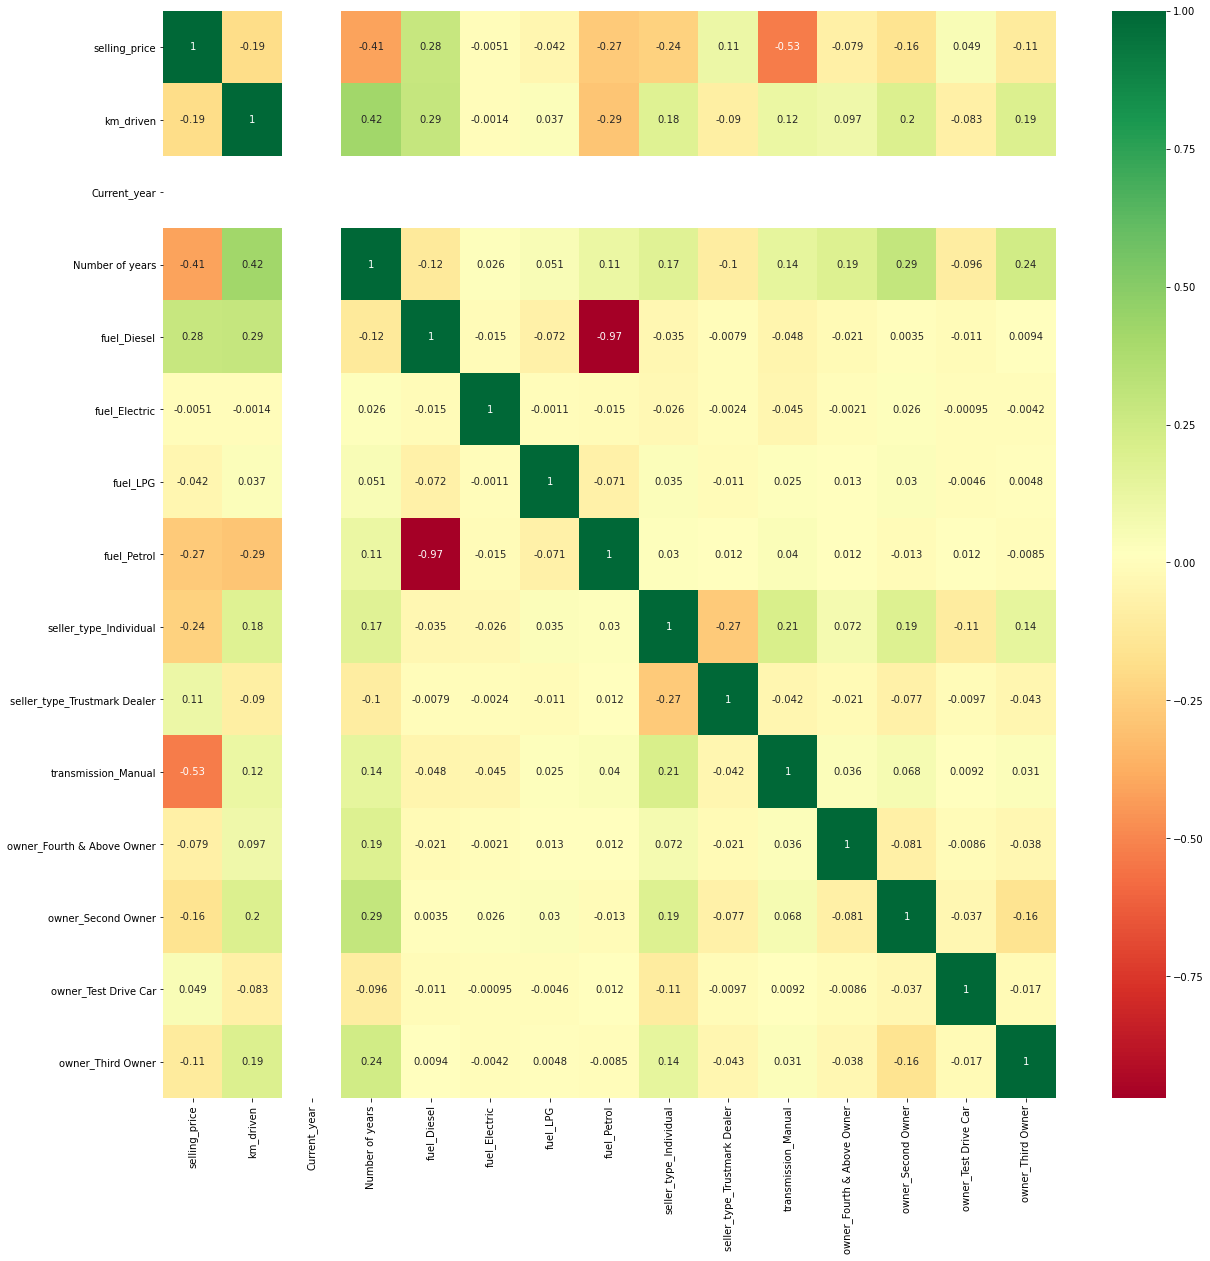

In [23]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

#plot heat map 
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [24]:
final_dataset.head()

,selling_price,km_driven,Current_year,Number of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,2022,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,2022,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,2022,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,2022,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,2022,8,1,0,0,0,1,0,1,0,1,0,0


In [25]:
###independent (x) and dependent(y) features
x= final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [26]:
x.head()

,km_driven,Current_year,Number of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,2022,15,0,0,0,1,1,0,1,0,0,0,0
1,50000,2022,15,0,0,0,1,1,0,1,0,0,0,0
2,100000,2022,10,1,0,0,0,1,0,1,0,0,0,0
3,46000,2022,5,0,0,0,1,1,0,1,0,0,0,0
4,141000,2022,8,1,0,0,0,1,0,1,0,1,0,0


In [27]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [28]:
###Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [29]:
print(model.feature_importances_)

[2.48347590e-01 0.00000000e+00 2.47094852e-01 1.29732530e-01
 4.52294694e-05 2.84449364e-05 1.96665802e-04 4.61062702e-02
 8.15112571e-03 2.92832523e-01 8.12871064e-04 2.12560266e-02
 9.55002330e-04 4.44086942e-03]


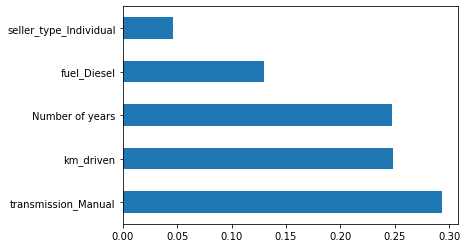

In [30]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh') 
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [32]:
x_train.head()


,km_driven,Current_year,Number of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
996,70000,2022,10,0,0,0,1,1,0,1,0,0,0,1
3581,70000,2022,5,1,0,0,0,1,0,1,0,0,0,0
1113,200000,2022,9,1,0,0,0,1,0,1,0,1,0,0
606,52000,2022,10,1,0,0,0,0,0,1,0,0,0,0
1835,86000,2022,9,1,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [34]:
####Hyperparameters tuning
###n_estimators is decision trees. below code will define different decision trees
import numpy as np
n_estimators=[int(x) for x in np.linspace(start =100, stop=1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [36]:
###Randomized Search CV

#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start = 100, stop =1200, num=12)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
# Minimum number of samples  required at each leaf node
min_samples_leaf = [1,2,5,10]

In [37]:
from sklearn.model_selection import RandomizedSearchCV ### RandomizedSearchCV will get the parameters from above code for random forest 

In [42]:
# Create the random grid
random_grid={'n_estimators':n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [43]:
## Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [44]:
rf_random= RandomizedSearchCV(estimator= rf, param_distributions= random_grid, scoring='neg_mean_squared_error', n_iter =10,cv=5, verbose=2, random_state=42, n_jobs=1)

In [45]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [46]:
predictions=rf_random.predict(x_test)

In [47]:
predictions

array([ 553931.67477782,  253920.77051595,  420438.0429058 ,
        701381.51677672,  326085.08106251,  386447.50487191,
        146649.56419338,  941070.33908672,  367881.83115111,
        428069.43002901,  572178.13592887,  227307.35125336,
        492986.08503592,  395285.69018408,  723119.09208097,
       1026021.5568316 ,  404147.07464361,  494450.50870503,
        502259.61666097, 1616673.53505841,  968726.48914053,
        362446.33517736,  575836.5731404 ,  247140.659799  ,
        109562.40957186,  117472.72827426,  689727.62028983,
        572574.28451335,  498368.53589611,  714783.6391064 ,
        102740.98269897,  586553.10841319,  144997.04423083,
        878531.28732469,  268262.09657231,  178634.52776439,
        484081.5334659 ,  507901.28770291,  442176.8058566 ,
        233416.66595302,  667662.21736274,  228335.47454043,
        183260.5787431 ,  330328.85661203,  320795.52924267,
        290149.99432569, 1901633.04348715,  965068.76788969,
        424676.11961189,

C:\Users\karti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

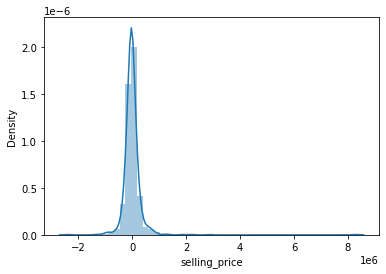

In [48]:
sns.distplot(y_test-predictions)

In [49]:
import pickle
#open a file, where you want to store the data
file = open('random_forest_regression_model.pkl','wb')

#dump information to that file
pickle.dump(rf_random, file)